# FMCW Radar 109- Radar Cube

(16, 4)


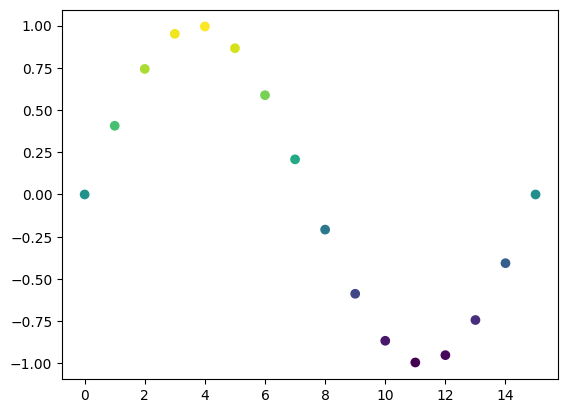

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

n_adc = 16
n_chirp = 16
n_antenna = 4

sinewave = np.sin(2*np.pi*np.linspace(0,1,n_adc))
cmap = plt.get_cmap('viridis')  # Choose a colormap (e.g., 'viridis')
norm = mcolors.Normalize(vmin=sinewave.min(), vmax=sinewave.max())
sinewave_colored = cmap(norm(sinewave))
print(sinewave_colored.shape)

def rgba_to_hex(rgba_color):
    # Assuming the input is in the range [0, 1]
    r, g, b, a = rgba_color
    # Convert to 0-255 range and cast to integer
    r_int = int(r * 255)
    g_int = int(g * 255)
    b_int = int(b * 255)
    a_int = int(a * 255)
    # Format as a hex string (e.g., #RRGGBBAA)
    hex_string = f"#{r_int:02x}{g_int:02x}{b_int:02x}{a_int:02x}"
    return hex_string



# You can now use sinewave_colored for visualization,
# for example, in a scatter plot:
plt.figure()
plt.scatter(np.arange(len(sinewave)), sinewave, c=sinewave_colored)

sinewave_colored = np.array([rgba_to_hex(color) for color in sinewave_colored])


# build up the numpy logo
n_voxels = np.zeros((16, 4, 16), dtype=bool)
n_voxels[:,:,:] = True
facecolors = np.where(n_voxels, '#FFffff00', '#7A88CCC0')
# facecolors = np.where(n_voxels, '#FF0000FF', '#FFFFFF11')
facecolors[:,0,0] = sinewave_colored

#edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
#edgecolors = np.where(n_voxels, "#ff000000","#ff000000")
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)



# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95



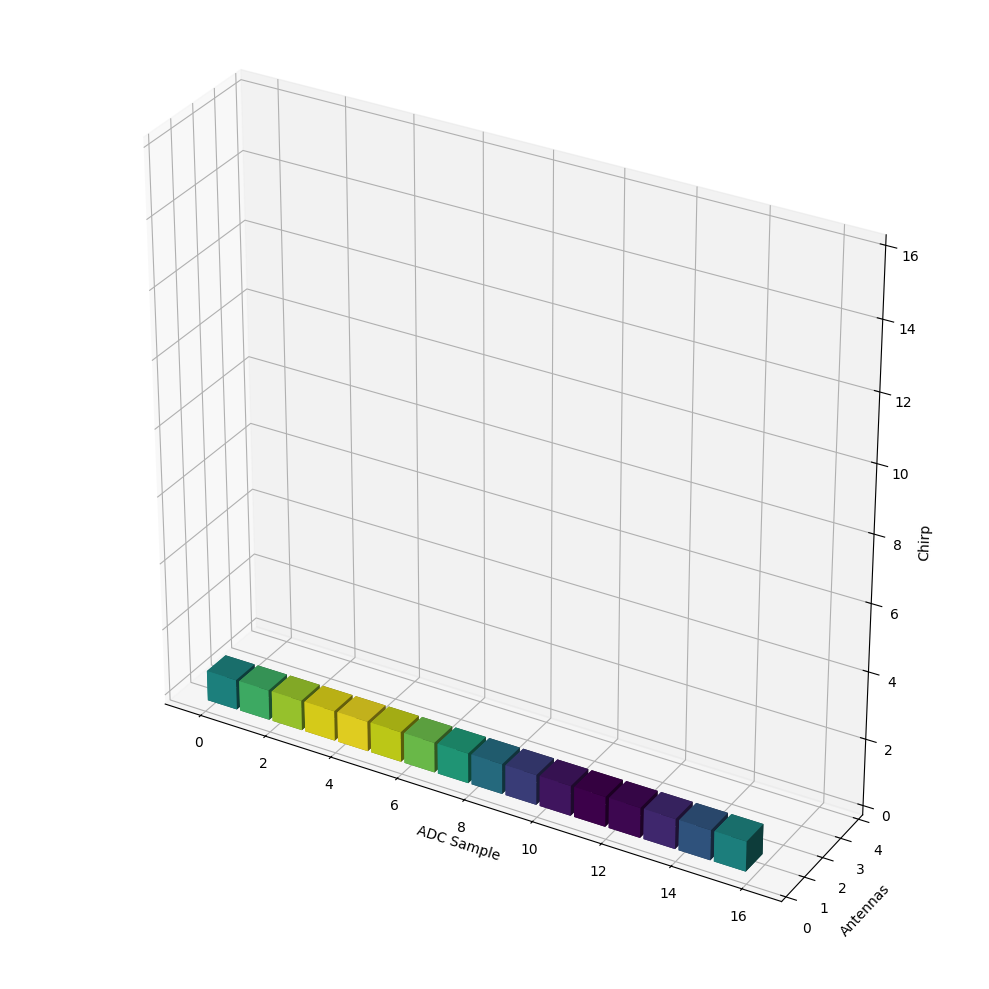

In [ ]:
ax = plt.figure(figsize=(12, 10)).add_subplot(projection='3d')

ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_aspect('equal')
ax.set_xlabel('ADC Sample')
ax.set_ylabel('Antennas')
ax.set_zlabel('Chirp')
plt.tight_layout()
plt.show()

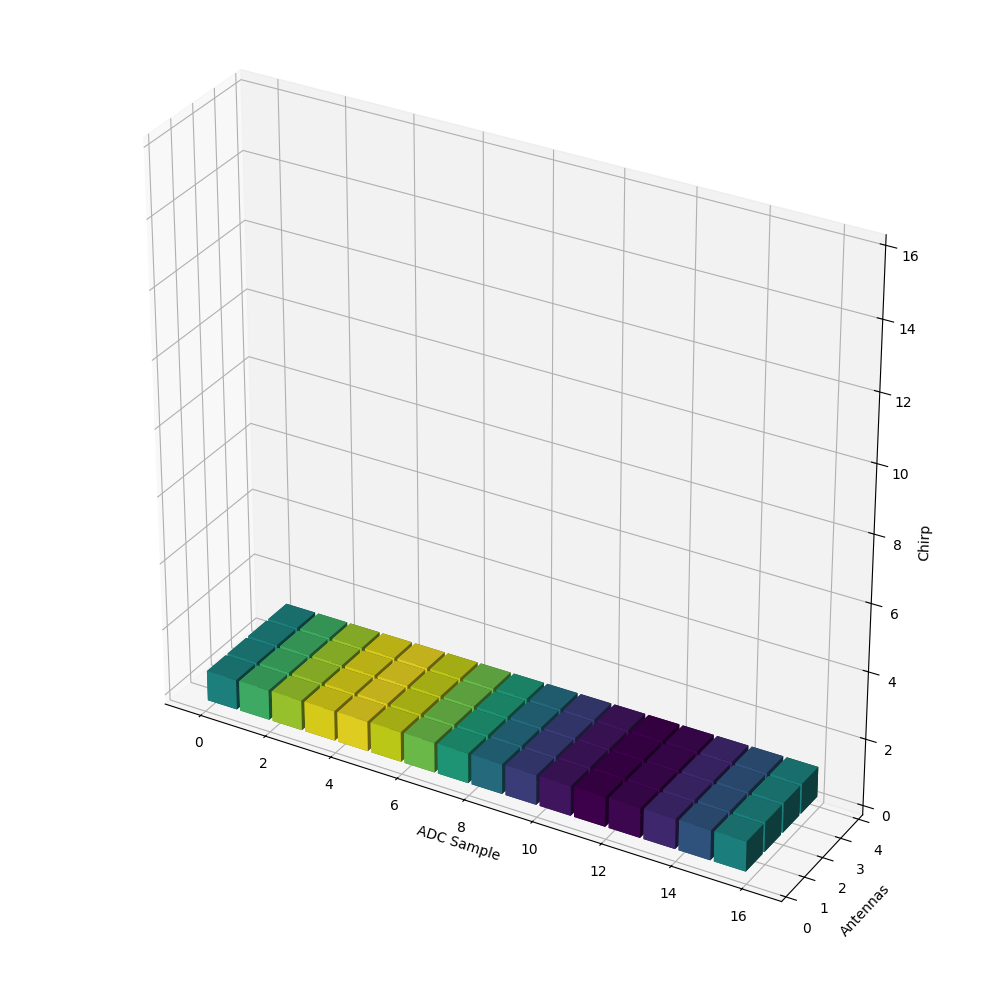

In [ ]:
facecolors[:,1,0] = sinewave_colored
facecolors[:,2,0] = sinewave_colored
facecolors[:,3,0] = sinewave_colored
fcolors_2 = explode(facecolors)

ax = plt.figure(figsize=(12, 10)).add_subplot(projection='3d')

ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_aspect('equal')
ax.set_xlabel('ADC Sample')
ax.set_ylabel('Antennas')
ax.set_zlabel('Chirp')
plt.tight_layout()
plt.show()

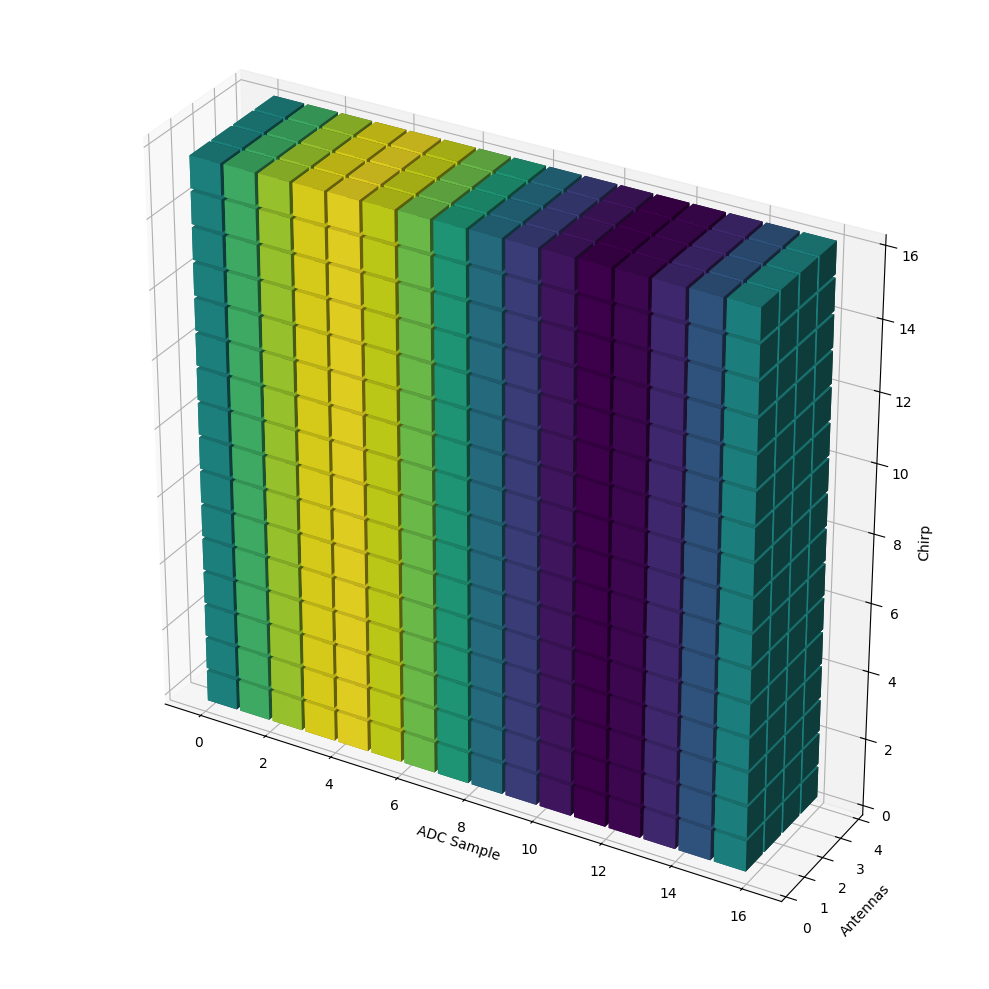

In [ ]:
for chirp_idx in range(n_chirp):
    for antenna_idx in range(n_antenna):
        facecolors[:,antenna_idx,chirp_idx] = sinewave_colored

fcolors_2 = explode(facecolors)

ax = plt.figure(figsize=(12, 10)).add_subplot(projection='3d')

ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_aspect('equal')
ax.set_xlabel('ADC Sample')
ax.set_ylabel('Antennas')
ax.set_zlabel('Chirp')
plt.tight_layout()
plt.show()

## Range FFT

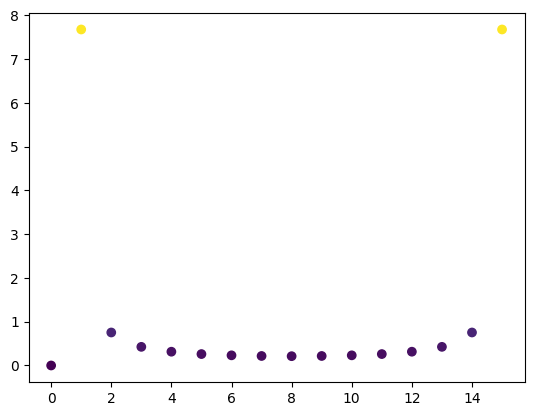

In [ ]:
from numpy.fft import fft, fftfreq

range_fft = abs(fft(sinewave))
frequencies = fftfreq(n_adc)

cmap = plt.get_cmap('viridis')  # Choose a colormap (e.g., 'viridis')
norm = mcolors.Normalize(vmin=range_fft.min(), vmax=range_fft.max())
fft_colored = cmap(norm(range_fft))
plt.figure()
plt.scatter(np.arange(len(range_fft)), range_fft, c=fft_colored)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (16,8,32)  and requested shape (32,8,32)

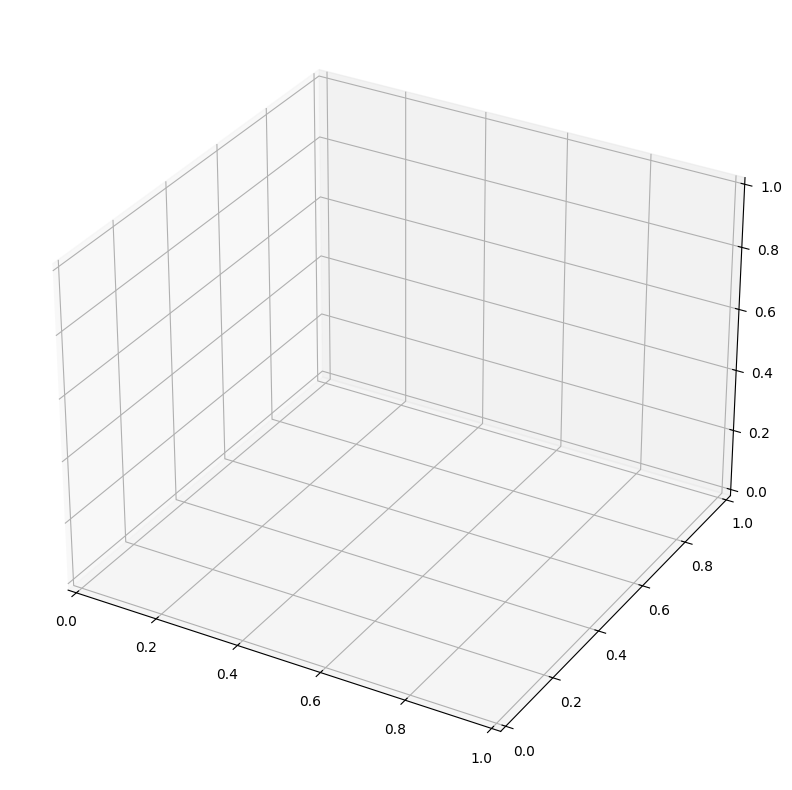

In [ ]:
range_fft_colored = np.array([rgba_to_hex(color) for color in fft_colored])

for chirp_idx in range(n_chirp):
    for antenna_idx in range(n_antenna):
        facecolors[:,antenna_idx,chirp_idx] = range_fft_colored

fcolors_2 = explode(facecolors)

ax = plt.figure(figsize=(12, 10)).add_subplot(projection='3d')

ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_aspect('equal')
ax.set_xlabel('Range FFT bins')
ax.set_ylabel('Antennas')
ax.set_zlabel('Chirp')
plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (16,8,32)  and requested shape (17,8,32)

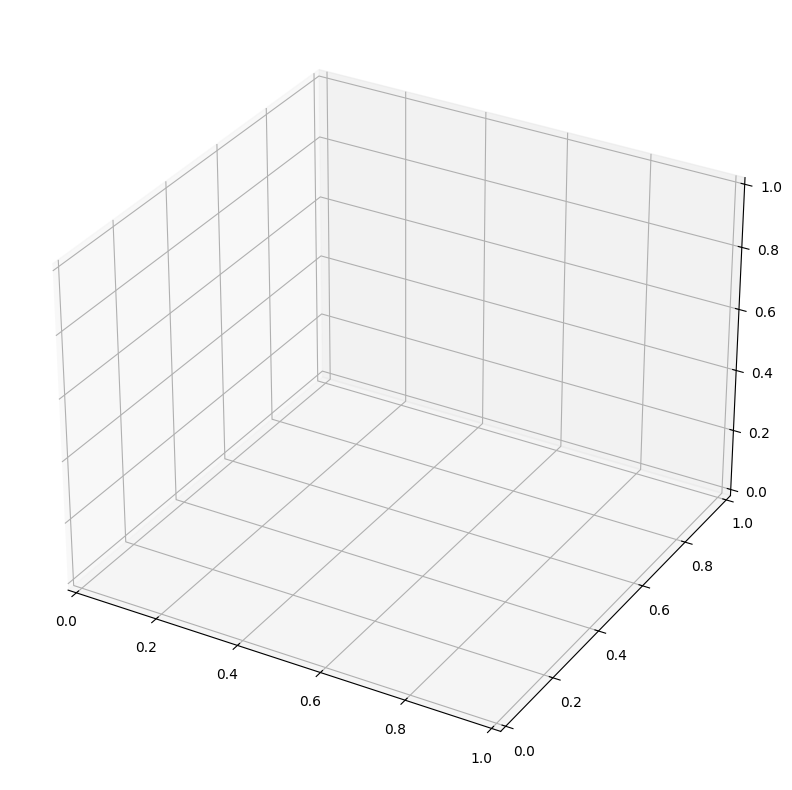

In [ ]:
# prompt: how to plot only half of the x values in above 3d plot

import matplotlib.pyplot as plt
# Plotting only the first half of the x values
ax = plt.figure(figsize=(12, 10)).add_subplot(projection='3d')

# Select only the first half of the x indices and the corresponding data
half_x_indices = slice(0, len(x)//2)
ax.voxels(x[half_x_indices, :, :], y[half_x_indices, :, :], z[half_x_indices, :, :],
          filled_2[half_x_indices, :, :], facecolors=fcolors_2[half_x_indices, :, :],
          edgecolors=ecolors_2[half_x_indices, :, :])

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_aspect('equal')
ax.set_xlabel('Range FFT bins')
ax.set_ylabel('Antennas')
ax.set_zlabel('Chirp')
plt.tight_layout()
plt.show()
